In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# параметры распределений
mu0 = torch.tensor([-5., -1.])
mu1 = torch.tensor([0., 2.])
sigma0 = torch.tensor([[2., 0.], [0., 3.]])
sigma1 = torch.tensor([[4., 0.], [0., 1.]])

In [0]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [0]:
d0 = torch.distributions.MultivariateNormal(mu0, sigma0)
d1 = torch.distributions.MultivariateNormal(mu1, sigma1)

In [124]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([-0.5805,  0.4489]), tensor(-0.4751)]


In [125]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 1.422158
Ошибка после 1 итераций: 0.364812
Ошибка после 2 итераций: 0.273335
Ошибка после 3 итераций: 0.240359
Ошибка после 4 итераций: 0.220146
Ошибка после 5 итераций: 0.205816
Ошибка после 6 итераций: 0.196196
Ошибка после 7 итераций: 0.188118
Ошибка после 8 итераций: 0.180684
Ошибка после 9 итераций: 0.175633
Ошибка после 10 итераций: 0.170155
Ошибка после 11 итераций: 0.165516
Ошибка после 12 итераций: 0.164044
Ошибка после 13 итераций: 0.161539
Ошибка после 14 итераций: 0.157176
Ошибка после 15 итераций: 0.155146
Ошибка после 16 итераций: 0.152880
Ошибка после 17 итераций: 0.151142
Ошибка после 18 итераций: 0.148540
Ошибка после 19 итераций: 0.148148


In [0]:
x_scale = np.linspace(-10, 10, 5000)
y_scale = np.linspace(-10, 10, 5000)

x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
y_tensor = torch.tensor(y_scale.reshape(-1, 1), dtype=torch.float)

xv, yv = np.meshgrid(x_tensor, y_tensor)

pos = np.empty(xv.shape + (2,))
pos[:, :, 0] = xv; pos[:, :, 1] = yv

d0_pdf = stats.multivariate_normal.pdf(pos, mu0, sigma0) 
d1_pdf = stats.multivariate_normal.pdf(pos, mu1, sigma1)

arr = np.stack((np.ravel(xv), np.ravel(yv)), axis=-1)

with torch.no_grad():
    dist = torch.sigmoid(layer(torch.tensor(arr))).numpy()
dist = dist.reshape(xv.shape)

ratio = d1_pdf / (d1_pdf + d0_pdf)

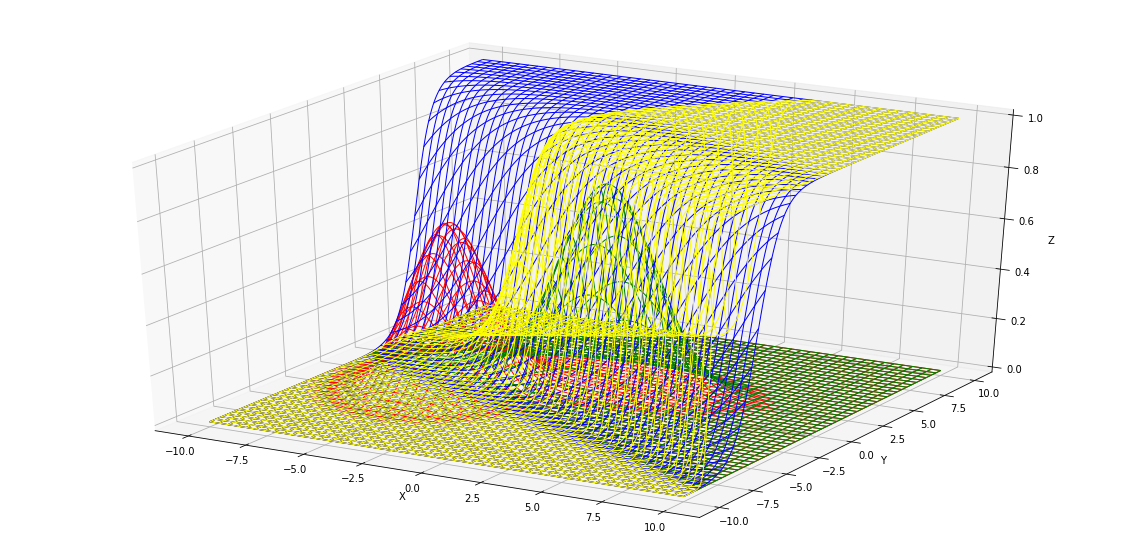

In [127]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, d0_pdf*10, linewidth=1, colors='red') # умножение на 10 для красоты графиков, на распределения не влияет
ax.plot_wireframe(X, Y, d1_pdf*10, linewidth=1, colors='green')
ax.plot_wireframe(X, Y, dist, linewidth=1, colors='blue')
ax.plot_wireframe(X, Y, ratio, linewidth=1, colors='yellow')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [128]:
print([p.data[0] for p in layer.parameters()])

[tensor([0.6851, 1.4106]), tensor(0.0209)]


In [129]:
torch.log(F.sigmoid(torch.tensor(-100.)))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(-inf)

In [130]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)